# Stable Marriage Problem

#### **Problem decomposition**
> 1. You are given a set of men and women, each with their own priority of spouse.
> 2. We must match each woman to each man, such that they're marriage is stable.
> 3. A stable marriage is one where no partner can have a better marriage than they currently have.

Let's first define the orders of the men and women

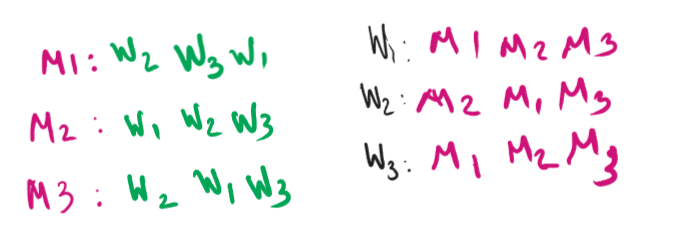

In [2]:
men = {"M1": ["W2", "W3", "W1"], "M2": ["W1", "W2", "W3"], "M3": ["W2", "W1", "W3"]}
women = {"W1": ["M1", "M2", "M3"], "W2": ["M2", "M1", "M3"], "W3": ["M1", "M2", "M3"]}

Algorithm:
> 1. Everyday, every unmatched woman will propose to her best choice.
> 2. Incase that best choice is also unmarried, they are tentatively engaged.
> 3. If that man is engaged already, he gets to choose this woman over his current wife:
    > Incase he prefers this woman more, his current engagement is called off and is now engaged to this woman.
> 4. This repeats till all the men / woman are married to someone, which will be the number of men / women on a worst case.

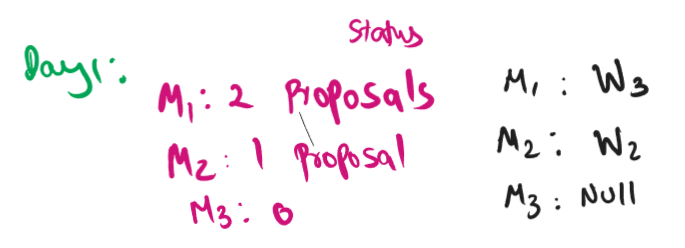

Day 1:
> In this example,
> 1. W1 proposes to M1
> 2. W2 proposes to M2
> 3. W3 proposes to M1

> M1 chooses W3 over W1 as he has has higher on his list.

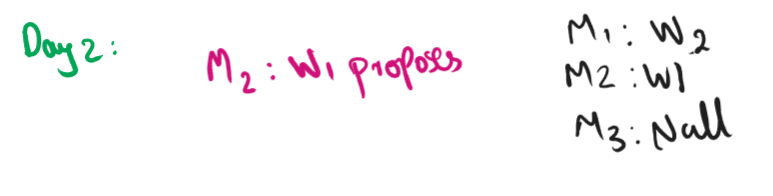

Day 2:
> 1. W1 is the only one without a pair, so she proposes to the next person on her order, who is M2

> M2 chooses W1 over W2 as he has has higher on his list.

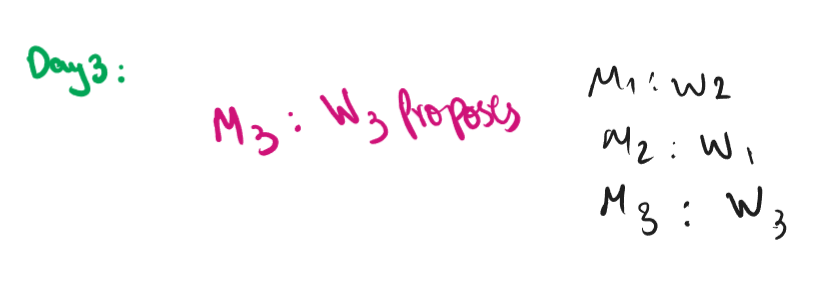

Day 3:
> 1. W3 proposes to her next choice, who is M3

> Since both are single, they choose to engage.

> Now that all are no longer single, we stop the algorithm.

In [3]:
#Stable Marriage Problem
#Code Implementation
def stable_marriage(num, men, women):
    m_status = {}
    w_status = {}
    for man in men:
        m_status[man] = False
    for w in women:
        w_status[w] = False
    for order in range(num):
        print("Day",order+1)
        for woman in women:
            if w_status[woman] is False:
                if m_status[women[woman][order]] is False:
                    print(woman,"Proposes to",women[woman][order])
                    m_status[women[woman][order]] = woman
                    w_status[woman] = m_status[women[woman][order]]
                    print(women[woman][order],"Accepts")
                else:
                    print(woman,"Proposes to",women[woman][order])
                    alr_wom = men[women[woman][order]].index(m_status[women[woman][order]])
                    cur_wom = men[women[woman][order]].index(woman)
                    if cur_wom < alr_wom:
                        print(women[woman][order],"rejects",m_status[women[woman][order]],"for",woman)
                        for i in m_status:
                            if m_status[i] == woman:
                                m_status[i] = False
                                w_status[woman] = False
                        w_status[m_status[women[woman][order]]] = False
                        m_status[women[woman][order]] = woman
                        w_status[woman] = m_status[women[woman][order]]

        print(m_status)
    return m_status

results = stable_marriage(3, men, women)
for i in results:
    print(i, ":", results[i])


Day 1
W1 Proposes to M1
M1 Accepts
W2 Proposes to M2
M2 Accepts
W3 Proposes to M1
M1 rejects W1 for W3
{'M1': 'W3', 'M2': 'W2', 'M3': False}
Day 2
W1 Proposes to M2
M2 rejects W2 for W1
W2 Proposes to M1
M1 rejects W3 for W2
W3 Proposes to M2
{'M1': 'W2', 'M2': 'W1', 'M3': False}
Day 3
W3 Proposes to M3
M3 Accepts
{'M1': 'W2', 'M2': 'W1', 'M3': 'W3'}
M1 : W2
M2 : W1
M3 : W3
